In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import torch
from torch.autograd import Variable 
import torch.utils.data as Data


In [2]:
data = pd.read_csv('MLP_regresion.csv')
data.keys()
data.head(5)
len(data)
x = data['X']
y = data['Y']
np.shape(x), np.shape(y)

((1000,), (1000,))

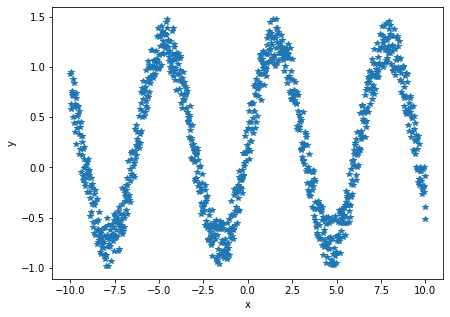

In [3]:
#visualizando los datos
fig = plt.figure(figsize=(7,5))
plt.plot(x,y,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
type(x)

pandas.core.series.Series

In [3]:
x = x.to_list()
x = np.array(x)

In [4]:
y = y.to_list()
y = np.array(y)

In [5]:
#a tensores

X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

Primer caso de ANN

In [20]:
#--- Definimos la ANN
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 1024),
                torch.nn.ReLU(),
                torch.nn.Linear(1024, input_dim),
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
)

In [9]:
type(model)

torch.nn.modules.container.Sequential

In [21]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

Epoch: [1/1], loss: 0.09948024153709412


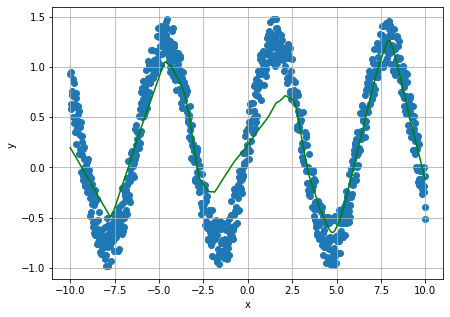

Epoch: [1/51], loss: 0.07337567210197449


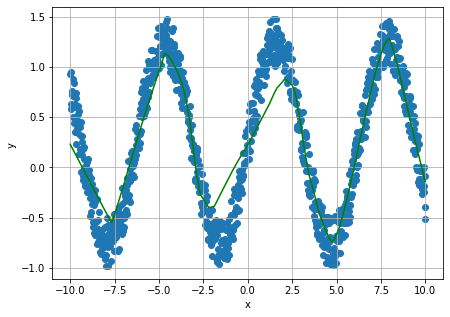

Epoch: [1/101], loss: 0.05845923721790314


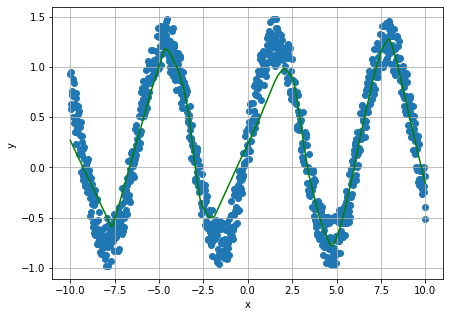

Epoch: [1/151], loss: 0.04877662658691406


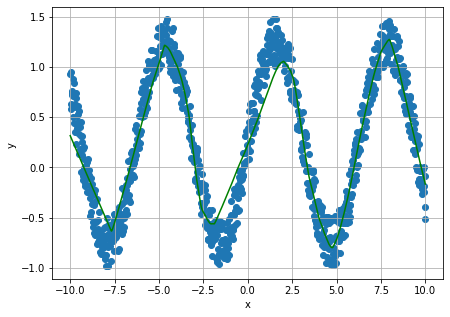

Epoch: [1/201], loss: 0.04168419539928436


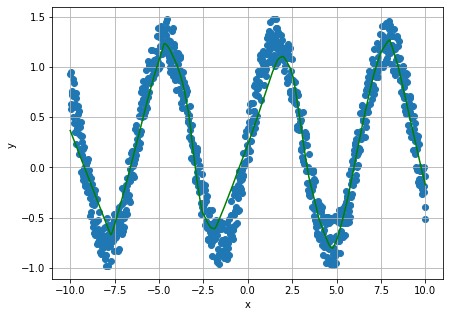

Epoch: [1/251], loss: 0.03674155846238136


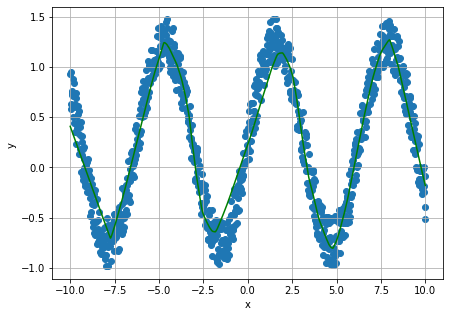

Epoch: [1/301], loss: 0.032942477613687515


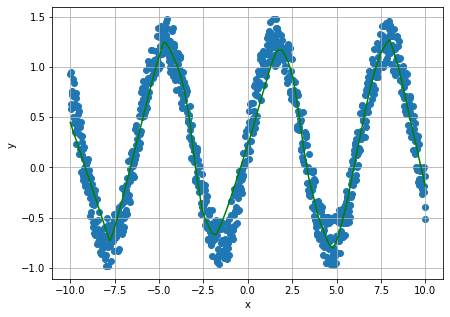

Epoch: [1/351], loss: 0.03012635000050068


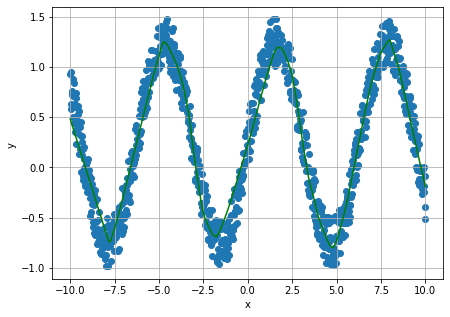

Epoch: [1/401], loss: 0.027888428419828415


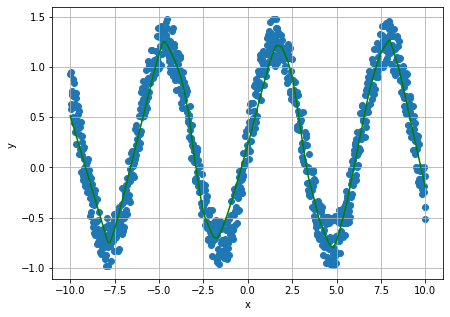

Epoch: [1/451], loss: 0.026169639080762863


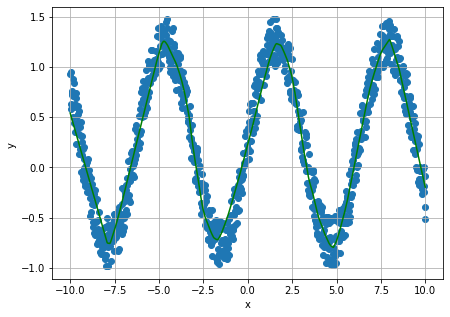

Epoch: [1/501], loss: 0.02480117231607437


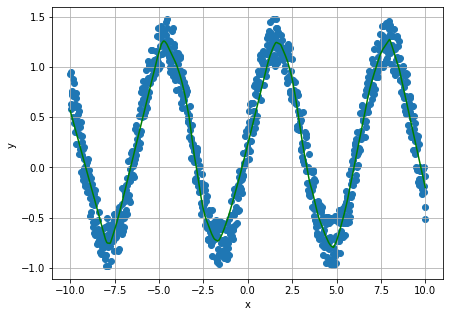

In [23]:
#-- Definimos el número de épocas
n_epoch = 500
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y ')
      plt.show()

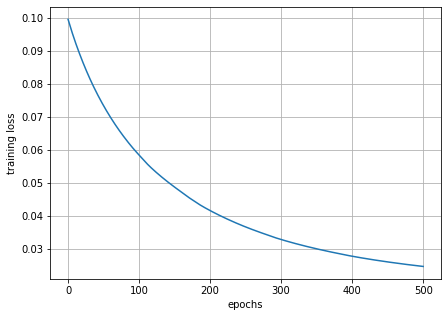

In [24]:
#-- Graficamos la perdida
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

Segundo modelo ANN


In [28]:
#--- Definimos la ANN
input_dim = 1
neurona = 1500
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, neurona),
                torch.nn.ReLU(),
                torch.nn.Linear(neurona, neurona),
                torch.nn.ReLU(),
                torch.nn.Linear(neurona, input_dim)
          
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=1500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1500, out_features=1500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1500, out_features=1, bias=True)
)

In [37]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE


Epoch: [1/1], loss: 0.04354141280055046


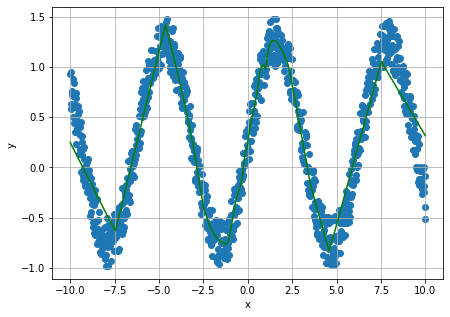

Epoch: [1/51], loss: 0.041515227407217026


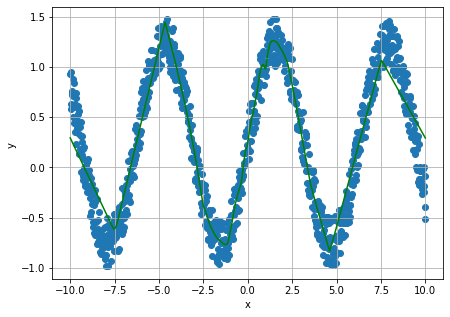

Epoch: [1/101], loss: 0.03869728371500969


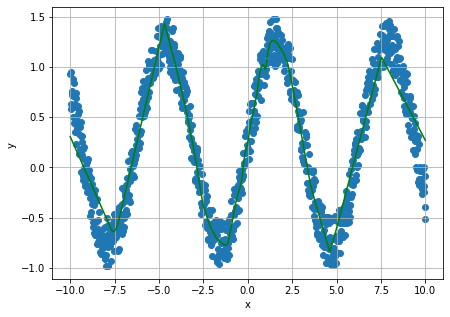

Epoch: [1/151], loss: 0.03587351366877556


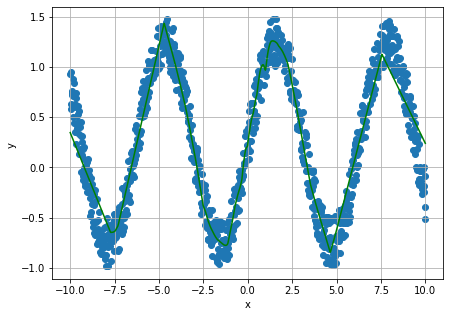

Epoch: [1/201], loss: 0.033143073320388794


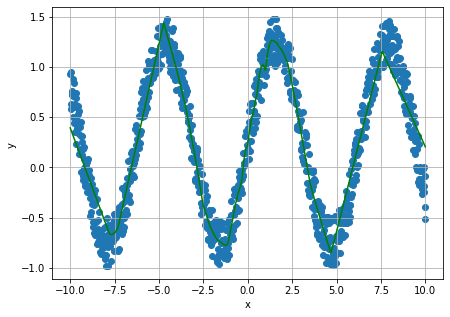

Epoch: [1/251], loss: 0.030647125095129013


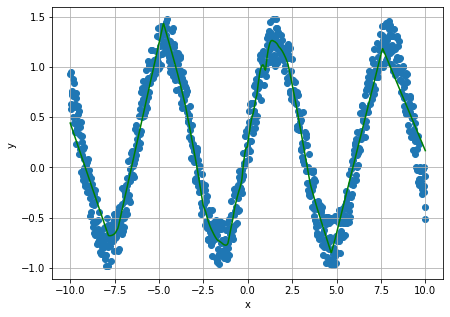

Epoch: [1/301], loss: 0.028401212766766548


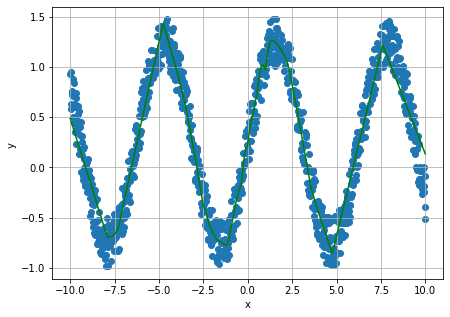

Epoch: [1/351], loss: 0.02647627331316471


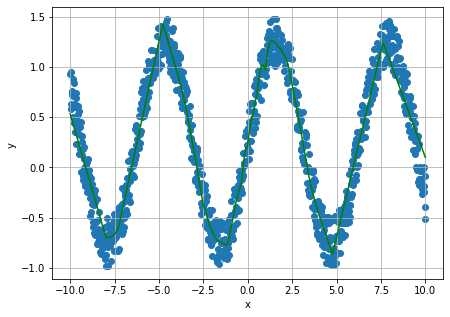

Epoch: [1/401], loss: 0.024917319416999817


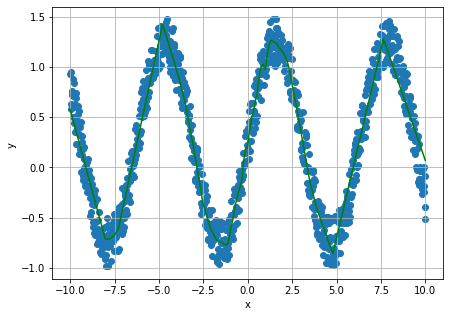

Epoch: [1/451], loss: 0.02369716577231884


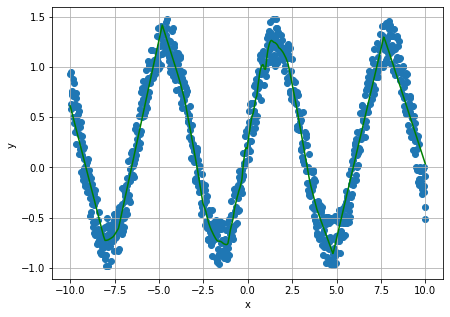

Epoch: [1/501], loss: 0.022757839411497116


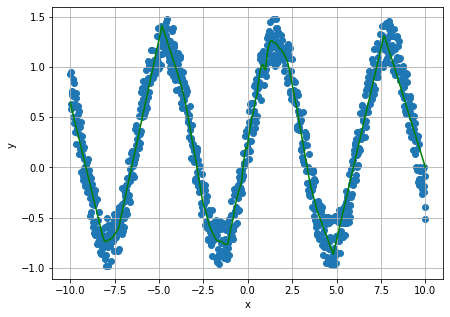

Epoch: [1/551], loss: 0.02213648520410061


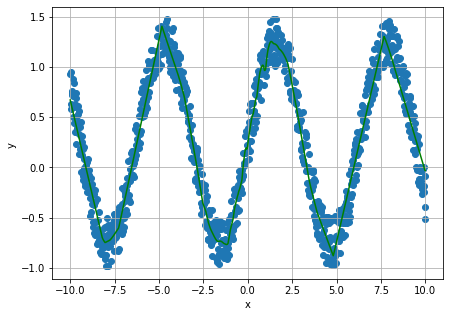

Epoch: [1/601], loss: 0.02170412242412567


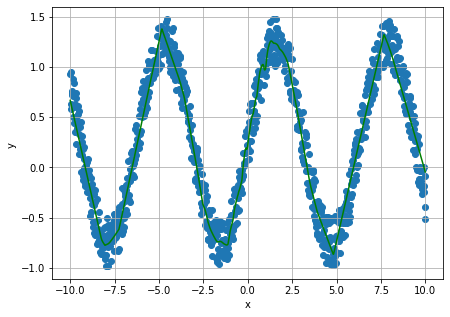

Epoch: [1/651], loss: 0.02113492041826248


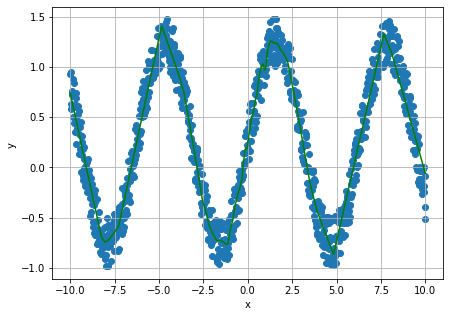

Epoch: [1/701], loss: 0.020807070657610893


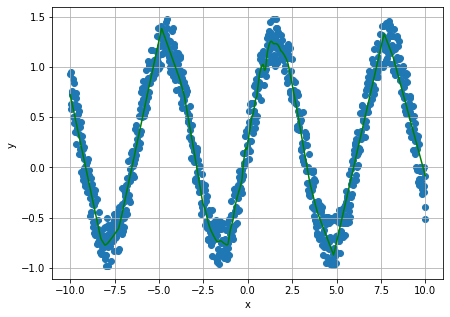

In [38]:
#-- Definimos el número de épocas
n_epoch = 700
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y ')
      plt.show()

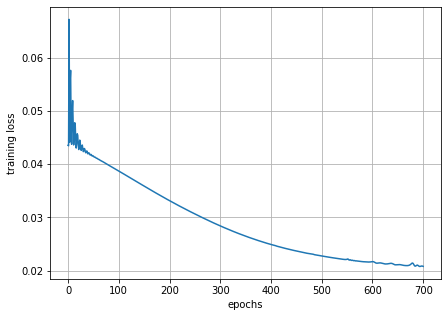

In [39]:
#-- Graficamos la perdida
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

Discusión de los dos modelos:



*   Primero: dos capas con 1024 neuronas, parámetro de optimización 0.1 y 500 épocas. 
*   Segundo:  tres capas con 1500 neuronas, parámetro de optimización 0.0001 y 700 épocas. 

Al observar el resultado del primero modelo, se puede ver en la gráfica de 'training loss' y 'epochs' tiene una caida exponencial, mientras que en la segunda no es muy claro esa tendencia. De esto, se puede decir que los parámetros del primer modelo son más óptimos. Además, al realizar varios intentos se pudo observar que la red aprendió más rápido al tener más neuronas y mayor número de épocas. Sin embargo, un parámetro que no fue muy claro cómo influye es el de optimización. 


